In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math_library as nsmath

# The Laplacian
the Laplacian operator is crucial in various fields, including fluid mechanics. The Laplacian operator, often denoted by ∇² (read as "del squared") or Δ, is a mathematical operator that plays a fundamental role in describing spatial variations or changes in a scalar or vector field. Let's break down what the Laplacian does and its significance in fluid mechanics:

## 1. Definition of the Laplacian Operator (∇² or Δ):
The Laplacian operator is defined in Cartesian coordinates as the divergence of the gradient of a scalar field or the second spatial derivative. In three dimensions, it's typically written as:  
    ∇²φ = ∂²φ/∂x² + ∂²φ/∂y² + ∂²φ/∂z²  
In simpler terms, it calculates the sum of the second partial derivatives of a scalar field with respect to each spatial dimension (x, y, z).


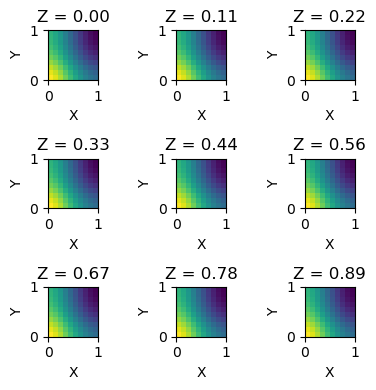

In [2]:
# Create a 3D grid
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
z = np.linspace(0, 1, 10)
xx, yy, zz = np.meshgrid(x, y, z)

# Define a scalar field phi as a function of x, y, z
phi = np.sin(xx) + np.cos(yy) + np.exp(-zz)

def calculate_and_plot_laplacian(phi):
    # Define grid spacing
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    dz = z[1] - z[0]

    # Calculate the Laplacian of phi
    laplacian_phi = nsmath.laplacian_3d(phi, dx, dy, dz)

    # Create a 3x3 grid of plots for the Laplacian at different z-values
    fig, axes = plt.subplots(3, 3, figsize=(4,4))

    for i in range(3):
        for j in range(3):
            ax = axes[i, j]
            z_index = i * 3 + j  # Index to choose a z-value
            ax.imshow(laplacian_phi[:, :, z_index], cmap='viridis', extent=[x.min(), x.max(), y.min(), y.max()])
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_title(f'Z = {z[z_index]:.2f}')

    plt.tight_layout()
    plt.show()
calculate_and_plot_laplacian(phi)

The plots of the Laplacian look similar because the scalar field phi used in the calculations has similar patterns across the entire 3D space, leading to similar Laplacian values at different z values. The Laplacian operator calculates the second spatial derivative of phi with respect to x, y, and z. If phi has similar variations or gradients along these axes, you'll observe similar Laplacian patterns.

In the code I provided earlier, the scalar field phi was constructed using a combination of sine, cosine, and exponential functions applied to xx, yy, and -zz. These functions have similar shapes across the entire domain, which is why the Laplacian patterns appear similar.

If you want to see more varied Laplacian patterns, you would need to create a scalar field phi with more complex and varied spatial variations or gradients in x, y, and z. You can experiment with different functions or data to achieve this.

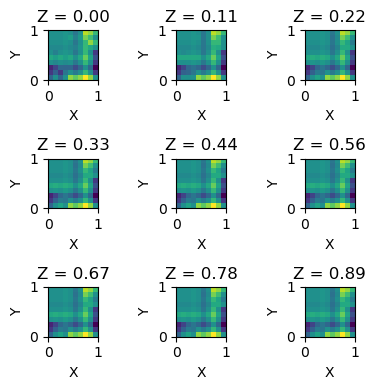

In [3]:
# Saddle-Shaped Surface:
phi = xx**2 - yy**2
calculate_and_plot_laplacian(phi)

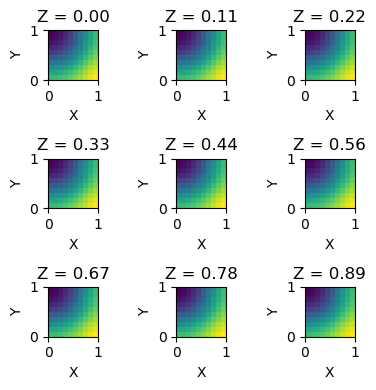

In [4]:
# Gaussian Peak:
sigma = 1.0
phi = np.exp(-(xx**2 + yy**2 + zz**2) / (2 * sigma**2))
calculate_and_plot_laplacian(phi)

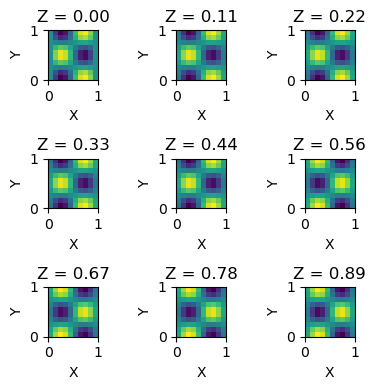

In [5]:
# Sine and Cosine Interactions:
phi = np.sin(2 * np.pi * xx) * np.cos(2 * np.pi * yy) * np.sin(2 * np.pi * zz)
calculate_and_plot_laplacian(phi)

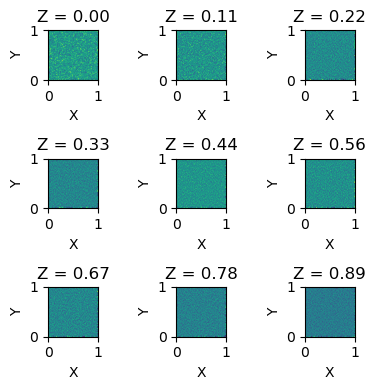

In [6]:
# Random Noise

# Define the range for each dimension (you can adjust these as needed)
min_nx = 50  # Minimum value for nx
max_nx = 100  # Maximum value for nx
min_ny = 50  # Minimum value for ny
max_ny = 100  # Maximum value for ny
min_nz = 10  # Minimum value for nz
max_nz = 30  # Maximum value for nz

# Generate random values for nx, ny, and nz
nx = random.randint(min_nx, max_nx)
ny = random.randint(min_ny, max_ny)
nz = random.randint(min_nz, max_nz)
phi = np.random.rand(nx, ny, nz)
calculate_and_plot_laplacian(phi)


## 2. Interpretation:
The Laplacian measures the rate of change of a scalar field at a given point in space. It quantifies how the scalar field varies from one point to another nearby point.  
When ∇²φ is positive at a point, it indicates that the scalar field φ is increasing in magnitude as you move away from that point.  
When ∇²φ is negative at a point, it indicates that the scalar field φ is decreasing in magnitude as you move away from that point.  
When ∇²φ is zero at a point, it implies that the scalar field φ is constant or has no change at that point.  

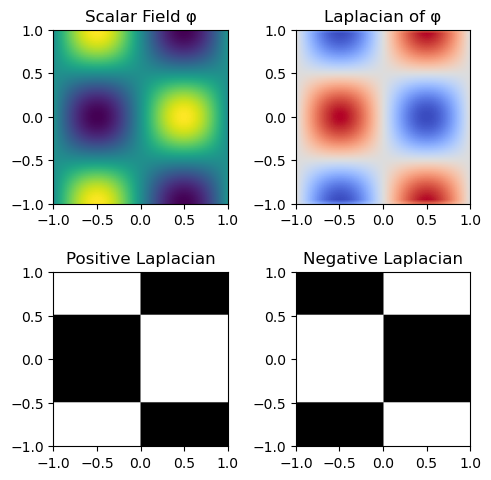

In [7]:
# Create a grid of points
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(x, y)

# Define a scalar field φ
phi = np.sin(np.pi * xx) * np.cos(np.pi * yy)

# Calculate the Laplacian of φ
laplacian_phi = np.gradient(np.gradient(phi, axis=0), axis=0) + np.gradient(np.gradient(phi, axis=1), axis=1)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(5, 5))

# Plot the original scalar field φ
axes[0, 0].imshow(phi, extent=(-1, 1, -1, 1), cmap='viridis')
axes[0, 0].set_title('Scalar Field φ')

# Plot the Laplacian of φ
axes[0, 1].imshow(laplacian_phi, extent=(-1, 1, -1, 1), cmap='coolwarm')
axes[0, 1].set_title('Laplacian of φ')

# Interpretation 1: Positive Laplacian indicates increasing magnitude
positive_laplacian = np.where(laplacian_phi > 0, 1, 0)
axes[1, 0].imshow(positive_laplacian, extent=(-1, 1, -1, 1), cmap='binary')
axes[1, 0].set_title('Positive Laplacian')

# Interpretation 2: Negative Laplacian indicates decreasing magnitude
negative_laplacian = np.where(laplacian_phi < 0, 1, 0)
axes[1, 1].imshow(negative_laplacian, extent=(-1, 1, -1, 1), cmap='binary')
axes[1, 1].set_title('Negative Laplacian')

plt.tight_layout()
plt.show()

## 3. Significance in Fluid Mechanics:
In fluid mechanics, the Laplacian operator is widely used to describe the distribution of various properties within a fluid, such as velocity, pressure, temperature, or concentration of a solute.  
For example, in the Navier-Stokes equations, which govern the motion of fluid, the Laplacian of velocity (∇²u, ∇²v, ∇²w) is used to describe the diffusion of momentum within the fluid.  
The Laplacian of pressure (∇²p) is often used in the pressure Poisson equation, which is essential for solving fluid flow problems.
It is also used to model diffusion processes, where it describes how a concentration or temperature field spreads due to diffusion.  

## 4. Numerical Solvers:
In numerical simulations of fluid flow, finite difference, finite element, or finite volume methods are used to discretize and solve the governing equations. The Laplacian operator is a central component of these numerical methods.  

In summary, the Laplacian operator (∇² or Δ) is a mathematical tool used to describe spatial variations or changes in scalar or vector fields. In fluid mechanics, it is crucial for understanding and modeling the distribution and diffusion of various properties within a fluid, making it a fundamental concept in the field.